<a href="https://colab.research.google.com/github/AlexanderF048/GOIT_DS/blob/main/HW_9_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import tensorflow

from tensorflow import keras
from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
from keras import losses
from keras import metrics

In [99]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data.
#y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (60000,) for the training data.
#x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.
#y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000,) for the test data.
print(f'train img:{x_train.shape},{type(x_train)}')
print(f'train labels:{y_train.shape},{type(x_train)}')
print(f'test img:{x_test.shape},{type(x_train)}')
print(f'test labels:{y_test.shape},{type(x_train)}')

print(f'test img #0:{x_train[0]}')
print(f'test lable_img #0:{y_train[0]}')


train img:(60000, 28, 28),<class 'numpy.ndarray'>
train labels:(60000,),<class 'numpy.ndarray'>
test img:(10000, 28, 28),<class 'numpy.ndarray'>
test labels:(10000,),<class 'numpy.ndarray'>
test img #0:[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64 

In [100]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

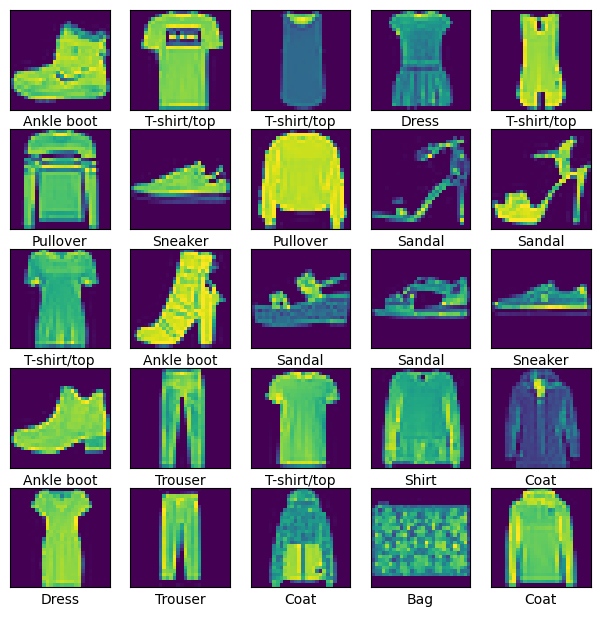

In [101]:
plt.figure(figsize=(7.5,7.5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

!Preprocess the pixels from 0-255 to 0-1!


In [102]:
#!Preprocess the pixels from 0-255 to 0-1!
x_train, x_test = x_train / 255.0, x_test / 255.0

# All to float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Matrix 28x28 pix to vect len. 784 el
#x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])


# Mix training data
#batch_size = 1000
#x_train = tensorflow.data.Dataset.from_tensor_slices((x_train, y_train))
#x_test = x_train.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [103]:
#print(f'test img #0:{vars(x_train)}')
print(f'test img #0:{x_train}')
print(f'test lable_img #0:{y_train[0]}')

test img #0:[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

In [124]:
model = Sequential([
    Flatten(input_shape=[28, 28, 1]),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

In [125]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.1),
    loss= 'categorical_crossentropy',
    metrics=[metrics.accuracy]
)
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_49 (Dense)            (None, 128)               100480    
                                                                 
 dense_50 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [126]:
#1

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)
print(history.history.keys())

Epoch 1/20


ValueError: ignored

313/313 [==============================] - 0s 1ms/step - loss: -24054433792.0000 - accuracy: 0.1000
[-24054433792.0, 0.10000000149011612]


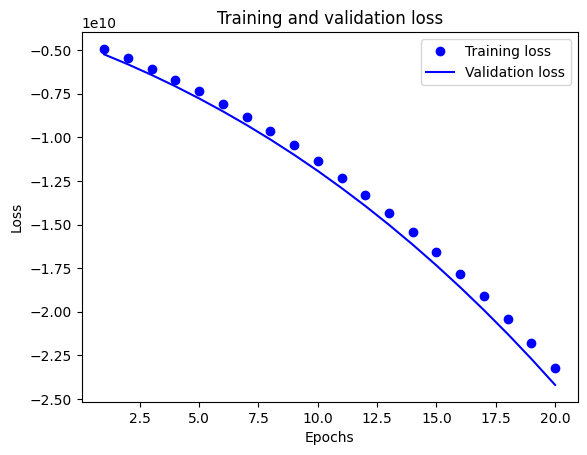

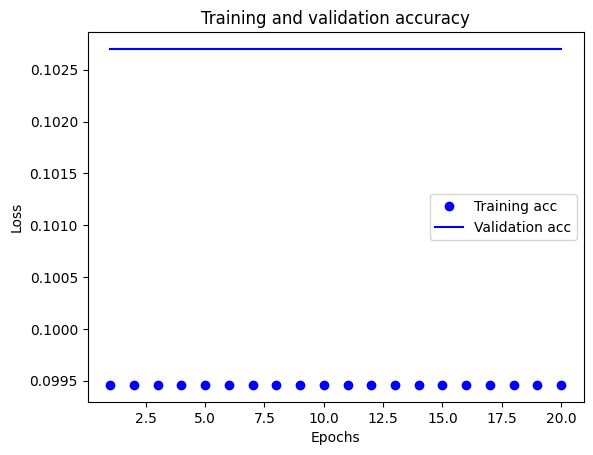

In [77]:
#______________________________________________________________________

results = model.evaluate(x_test, y_test)
print(results)

#______________________________________________________________________

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



<class 'numpy.ndarray'>


In [83]:
result = model.predict(x_test[0, :].reshape(1, 784))
print(result)

1/1 [==============================] - 0s 26ms/step
[[1.]]
